In [35]:
import numpy as np
import matplotlib.pyplot as plt


In [36]:
# parameters
T =2.2               #Temperature
j_ising =  1.0
L= 25               # size of lattice
niter = 10000       #mcs
nequil = 1000       # we will collect data after nequil so system can reach equillibrium before reaching at data
times = [] #monte carlo steps
temps=[] #to store temperature data
AvgE = [] #to store average energy
AvgM = [] #to store average magnetization
cvs = []
chis = []



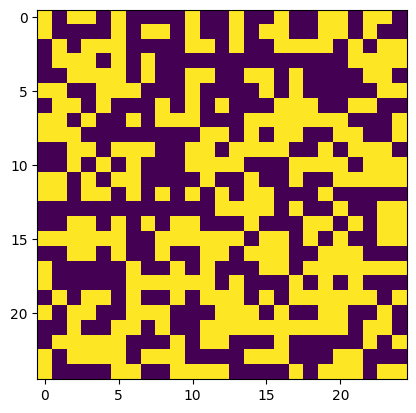

In [37]:

# intialise the lattice 50 up 50 down

# create an array of all 1s
lattice = np.full((L,L), 1)

#calculate the number of elements to changed to -1
num_to_change = L*L // 2

 #randomly chooose indices to change to -1
indices_to_change = np.random.choice(L*L, num_to_change, replace=False) 

#change the values at the selected indices to -1
lattice.flat[indices_to_change] = -1


# to check how many 1s we have
#totalones = np.sum(lattice==1)
#print(totalones)

plt.imshow(lattice)
plt.show()

In [38]:
E = 0.0  #instantanesous energy of the lattice
M = 0.0  #instantanesous magnetization of the lattice
N = L*L  #Total number of spins in the lattice


In [39]:
#calculate intial magnetization and energy 

for i in range (L):
    for j in range(L):
        a = (i + 1) % L  #Identification of neighbours  
        b = (i - 1) % L
        c = (j + 1) % L
        d = (j - 1) % L
                 
        M = M + lattice[i][j]
        E = E - j_ising*(lattice[i][j]*(lattice[a][j]+ lattice[b][j]+lattice[i][c]+lattice[i][d]))

mag = M//N       #magnetization (instantaneous) per spin, here N = L x L
E = E*0.5        # 0.5 for double counting 

print('initial energy E, E per spin = ', E,',', E/N)
print('initial magnetization M, M per spin = ', M ,',',mag)  


# Initialization complete   

initial energy E, E per spin =  -10.0 , -0.016
initial magnetization M, M per spin =  1.0 , 0.0


Evolve this to equilibrium using metropolis algorithm

In [40]:
#for equilibrium

for t_temp in range(30,15,-1): #Temperature loop 
    
    T = t_temp/10.0 # fix it 
    av_m,av_E = 0.0, 0.0        # AV. E,M of entire lattice
    av_m_N , av_e_N= 0.0, 0.0   #average E & M of entire lattice  
    av_m2 , av_e2= 0.0,0.0      #<E2>, <M2> of entire lattice
    
    for mcs in range(niter):#loop over monte carlo steps
        
        
        for _ in range(L):
            for _ in range (L):
                x = np.random.uniform()
                i = round(x*(L-1)) 
                y = np.random.uniform()
                j = round(y*(L-1))
                
                a = (i + 1) % L  #Identification of neighbours  
                b = (i - 1) % L
                c = (j + 1) % L
                d = (j - 1) % L
                
            
                Ei = -j_ising * (lattice[i][j]*(lattice[a][j]+ lattice[b][j]+lattice[i][c]+lattice[i][d]))
                
                lattice[i][j] = - lattice[i][j] #trial flip 
                
                Ef = -j_ising * (lattice[i][j]*(lattice[a][j]+ lattice[b][j]+lattice[i][c]+lattice[i][d]))
                
                dE = Ef-Ei
                
                if dE<0.0:
                    E = E + dE #updating Energy and Magnetization of Lattice
                    M = M + ( 2.0*lattice[i][j]) # change is twice 1-(-1)=2
                else:
                    u = np.exp(-dE/T)
                    h = np.random.rand()
                    if h<u:
                        E = E + dE #updating Energy and Magnetization of Lattice
                        M = M + ( 2.0*lattice[i][j]) # instantaneous magnetization of lattice
                        
                        
                    else:
                        lattice[i][j] = - lattice[i][j] # values not accepted E and M  Not updated
        
        if niter>nequil: #we are doing it so system can reach equillibrium
            mag = abs(M/N)          # magnetization(instantaneous) per spin 
            av_m = av_m + mag  
            av_E = av_E + E/N
            av_m_N = av_m_N + abs(M) # avg M of entire lattice
            av_e_N = av_e_N + E # avg E of entire lattice
            av_m2 = av_m2 + M*M # avg M2 of entire lattice
            av_e2 = av_e2 + E*E # avg E2 of entire lattice
            times.append(mcs)
            
    
            
           
    #out of niter loop 
    av_m = av_m/(niter-nequil)
    av_E = av_E/(niter-nequil) 
    av_e2 = av_e2/(niter-nequil)
    av_e_N = av_e_N/(niter-nequil)
    
    cv = (av_e2-av_e_N*av_e_N)/(T*T)
    av_m2 = av_m2/(niter-nequil)
    av_m_N = av_m_N/(niter-nequil) 
    
    chi = (av_m2-av_m_N*av_m_N)/T
        
    
    temps.append(T)
    AvgE.append(av_E)
    AvgM.append(av_m)
    cvs.append(cv)
    chis.append(chi)
    
    


    


In [41]:
with open(f"energy_vs_temperature_at_L_{L}.txt", "w") as file:
    for i in range(len(temps)):
        file.write(f"{temps[i]:<10} {AvgE[i]:<15}\n")

with open(f"magnetization_vs_temperature_at_L_{L}.txt", "w") as file:
    for i in range(len(temps)):
        file.write(f"{temps[i]:10} {AvgM[i]:<15}\n") 

with open(f"CV_vs_temperature_at_L_{L}.txt", "w") as file:
    for i in range(len(temps)):
        file.write(f"{temps[i]:<10} {cvs[i]:<15}\n")        

with open(f"chis_vs_temperature_at_L_{L}.txt", "w") as file:
    for i in range(len(temps)):
        file.write(f"{temps[i]:<10} {chis[i]:<15}\n")               
        

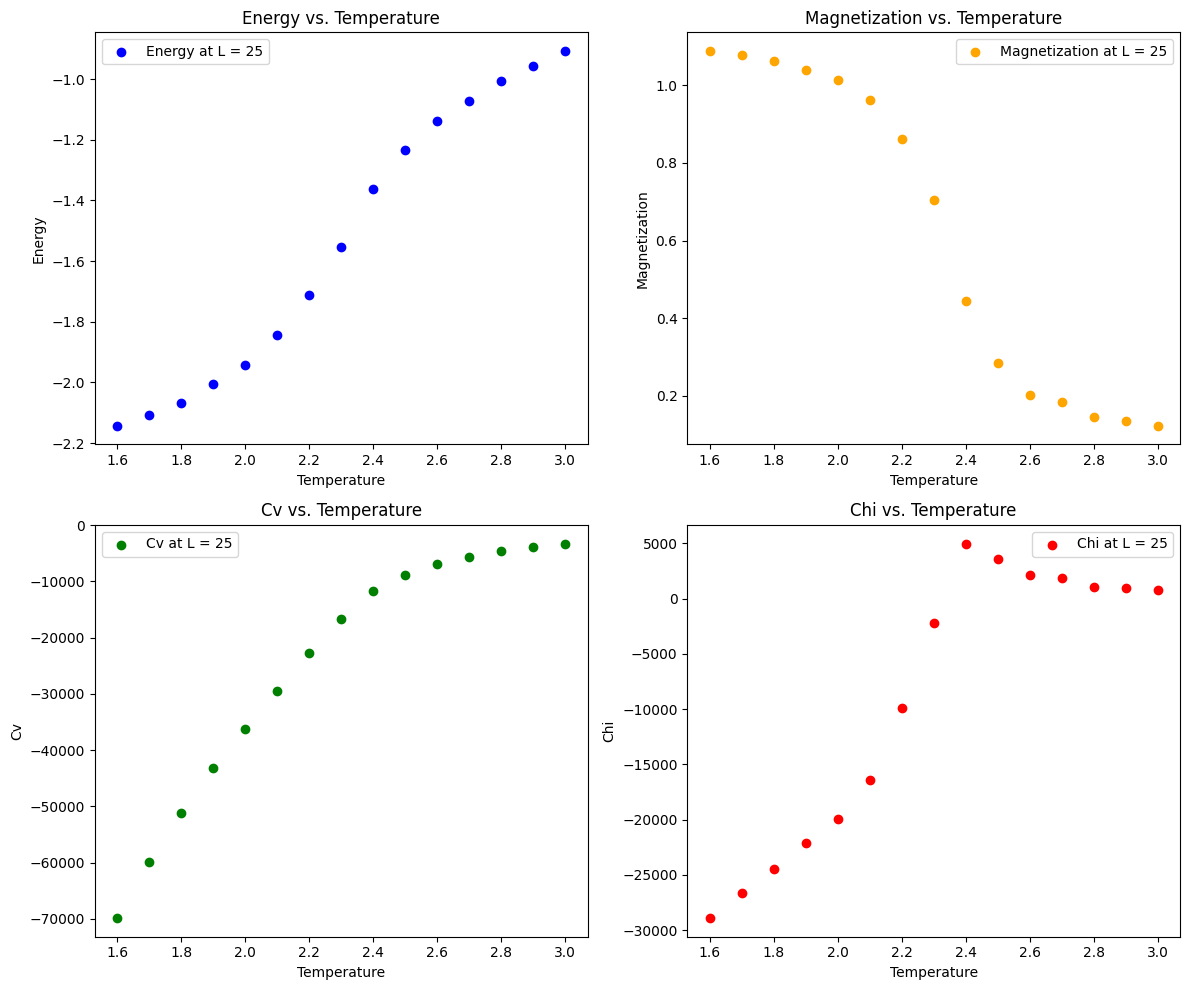

In [42]:
import matplotlib.pyplot as plt

# Scatter plot for Energy
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(temps, AvgE, label='Energy at L = {}'.format(L), color='blue')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs. Temperature')
plt.legend()

# Scatter plot for Magnetization
plt.subplot(2, 2, 2)
plt.scatter(temps, AvgM, label='Magnetization at L = {}'.format(L), color='orange')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs. Temperature')
plt.legend()

# Scatter plot for cv
plt.subplot(2, 2, 3)
plt.scatter(temps, cvs, label='Cv at L = {}'.format(L), color='green')
plt.xlabel('Temperature')
plt.ylabel('Cv')
plt.title('Cv vs. Temperature')
plt.legend()

# Scatter plot for chi
plt.subplot(2, 2, 4)
plt.scatter(temps, chis, label='Chi at L = {}'.format(L), color='red')
plt.xlabel('Temperature')
plt.ylabel('Chi')
plt.title('Chi vs. Temperature')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
